In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA


In [2]:
# Load customer and transaction data
customers_df = pd.read_csv('C:/Users/91790/Downloads/Customers.csv')
transactions_df = pd.read_csv('C:/Users/91790/Downloads/Transactions.csv')

customers_df.head(), transactions_df.head()


(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55         1   
 3        T00272      C0087      P067  2024-03-26 22:55:37         2   
 4        T00363      C0070      P067  2024-03-21 15:10:10         3   
 
    TotalValue   Price  
 0      300.68  300.68  
 1      300.68  300.68  
 2      300.68  300.68  
 3      601.36  300.68  
 4      902.04  300.68  )

In [3]:
# Merging both dataframes on 'CustomerID'
merged_df = pd.merge(customers_df, transactions_df, on='CustomerID')

merged_df.head()


,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64


In [5]:
print("Customer Data Columns:", customers_df.columns)
print("Transaction Data Columns:", transactions_df.columns)


Customer Data Columns: Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
Transaction Data Columns: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')


In [9]:
# Convert 'last_purchase_date' to days since last purchase
final_features['last_purchase_date'] = pd.to_datetime(final_features['last_purchase_date'])
current_date = pd.to_datetime('today')
final_features['days_since_last_purchase'] = (current_date - final_features['last_purchase_date']).dt.days
final_features.drop(columns=['last_purchase_date'], inplace=True)

# Select only the numeric columns for scaling
numeric_features = final_features.select_dtypes(include=[np.number])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

scaled_features[:5]


array([[-0.25882038],
       [-0.69698254],
       [ 0.73057805],
       [-0.9796678 ],
       [-0.2870889 ]])

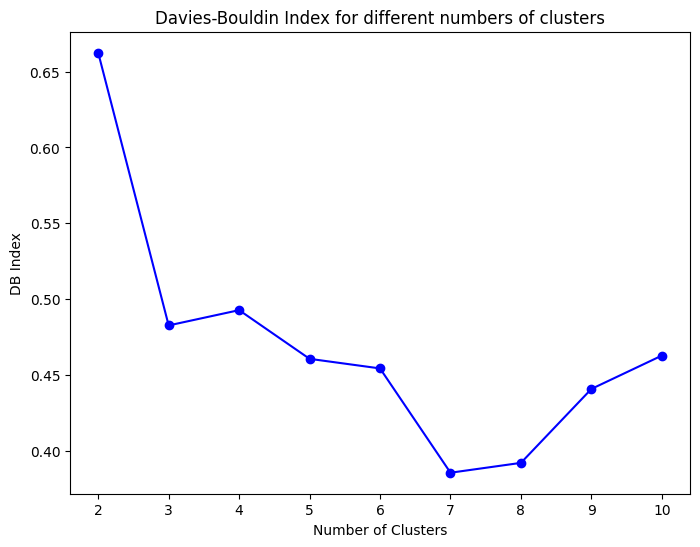

Optimal number of clusters: 7


In [14]:
db_indexes = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    
    db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
    db_indexes.append(db_index)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), db_indexes, marker='o', linestyle='-', color='b')
plt.title('Davies-Bouldin Index for different numbers of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.show()

optimal_clusters = np.argmin(db_indexes) + 2
print(f"Optimal number of clusters: {optimal_clusters}")


In [12]:
# Check the shape of the scaled_features
print("Scaled Features Shape:", scaled_features.shape)

if scaled_features.shape[1] < 2:
    print("Not enough features for PCA. Please check the feature engineering steps.")
else:
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_features)

    final_features['Cluster'] = labels

    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(scaled_features)

    # Plot the clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=final_features['Cluster'], palette='Set1', s=100, alpha=0.7)
    plt.title(f'Customer Segments (K={optimal_clusters})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster', loc='best')
    plt.show()


Scaled Features Shape: (199, 1)
Not enough features for PCA. Please check the feature engineering steps.


In [15]:
cluster_centers = kmeans.cluster_centers_
print(f"Cluster centers:\n{cluster_centers}")
cluster_counts = final_features['Cluster'].value_counts()
print(f"Cluster counts:\n{cluster_counts}")


Cluster centers:
[[-0.72053964]
 [ 0.71066159]
 [ 3.7941796 ]
 [-0.01702352]
 [ 2.97321448]
 [ 2.13693724]
 [ 0.29622127]
 [ 1.20548929]
 [-0.34781389]
 [-0.94942705]]
Cluster counts:
Cluster
0    73
3    42
5    40
1    31
4     6
2     4
6     3
Name: count, dtype: int64
